<a href="https://colab.research.google.com/github/rakhahadiyazid/rakhahadiyazid23_23423056/blob/main/UTS_CITRADIGITAL_RAKHAHADIYAZID23423056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NO 1

In [1]:
pip install opencv-python matplotlib

**Reasoning**:
Now that the necessary libraries are installed, I will load the image 'contoh.jpg' and convert it to grayscale as per the subtask instructions. I will also display both the original and grayscale images to confirm the conversion.



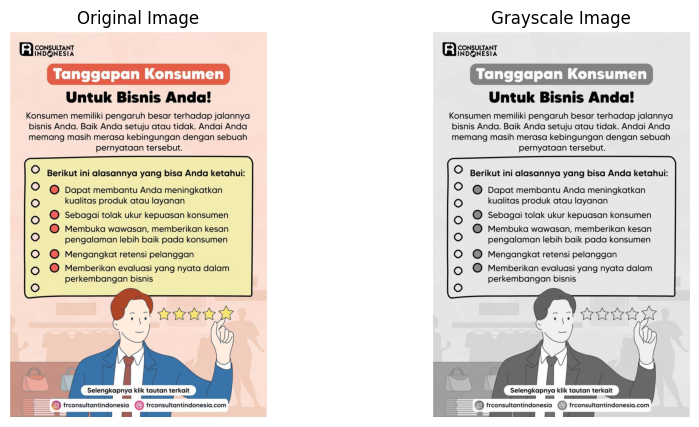

Original and grayscale images displayed successfully.


In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/contoh.jpg'
original_image = cv2.imread(image_path)

# Check if image was loaded successfully
if original_image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert the image to grayscale
    # OpenCV loads images in BGR format by default, so convert to RGB for displaying with matplotlib
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Display the original and grayscale images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.show()
    print("Original and grayscale images displayed successfully.")

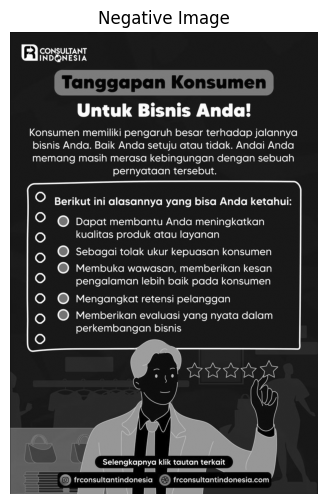

Negative image displayed successfully.


In [3]:
import numpy as np

# Apply negative transformation
negative_image = 255 - gray_image

# Display the negative image
plt.figure(figsize=(6, 6))
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()
print("Negative image displayed successfully.")

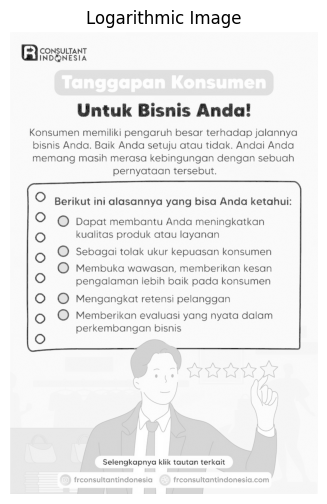

Logarithmic image displayed successfully.


In [4]:
import numpy as np

# Convert image to float32 for calculations to avoid overflow issues
gray_image_float = gray_image.astype(np.float32)

# Calculate the constant c
max_pixel_value = np.max(gray_image_float)
c = 255 / np.log(1 + max_pixel_value)

# Apply logarithmic transformation
log_image = c * np.log(1 + gray_image_float)

# Normalize the output to 0-255 and convert to uint8
log_image_normalized = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
log_image_normalized = log_image_normalized.astype(np.uint8)

# Display the logarithmic image
plt.figure(figsize=(6, 6))
plt.imshow(log_image_normalized, cmap='gray')
plt.title('Logarithmic Image')
plt.axis('off')
plt.show()
print("Logarithmic image displayed successfully.")

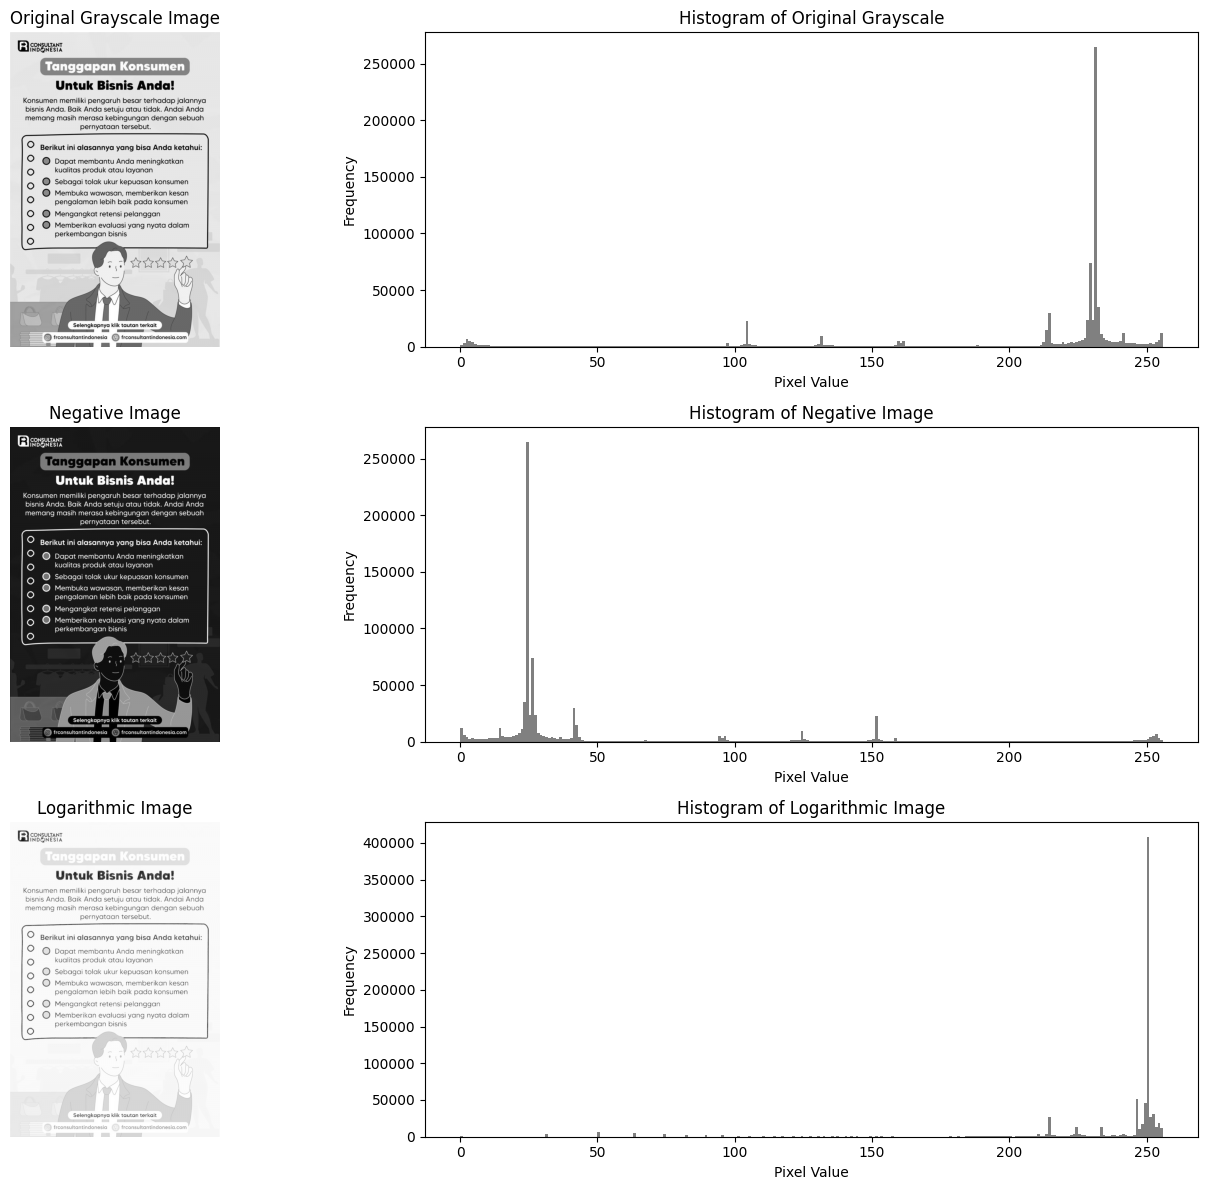

Original, negative, and logarithmic images along with their histograms displayed successfully.


In [5]:
import matplotlib.pyplot as plt
import cv2

# Create a figure to display all images and their histograms
plt.figure(figsize=(15, 12))

# Original Grayscale Image and Histogram
plt.subplot(3, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(gray_image.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Original Grayscale')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Negative Image and Histogram
plt.subplot(3, 2, 3)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(negative_image.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Negative Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Logarithmic Image and Histogram
plt.subplot(3, 2, 5)
plt.imshow(log_image_normalized, cmap='gray')
plt.title('Logarithmic Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(log_image_normalized.flatten(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Logarithmic Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Original, negative, and logarithmic images along with their histograms displayed successfully.")

In [6]:
analysis_content = """
Analysis of Image Transformations

1. Grayscale Value Distribution of Original Image:
   The histogram of the original grayscale image shows the distribution of pixel intensities before any transformations. Observe if the pixels are concentrated in certain ranges (e.g., mostly dark or mostly bright areas).

2. Grayscale Value Distribution of Negative Image:
   The negative transformation inverts the pixel intensities (G = 255 - F). Dark areas become bright, and bright areas become dark. Consequently, the histogram of the negative image will be a mirror image of the original grayscale histogram. This transformation is useful for enhancing white or gray detail embedded in dark regions of an image.

3. Grayscale Value Distribution of Logarithmic Image:
   The logarithmic transformation (G = c * log(1 + F)) expands the range of dark pixel values while compressing the range of bright pixel values. This is particularly useful for images with a narrow range of low-intensity values, making details in the darker regions more visible. The histogram for the logarithmic image will typically show a shift towards higher pixel values, indicating that darker areas have been brightened.

4. Comparison of Logarithmic vs. Negative Transformations:
   - **Negative Transformation**: Provides a simple inversion of intensities. It's effective when the image has features that are dark on a light background or vice-versa, and a direct inversion helps in better visualization. It does not alter the dynamic range of intensities in a non-linear way, just inverts them.
   - **Logarithmic Transformation**: Offers a non-linear mapping, primarily designed to enhance details in the darker regions of an image. It expands the intensity values of dark pixels and compresses those of bright pixels, which is beneficial for images with a high dynamic range or underexposed areas. Unlike negative transformation, it redistributes the intensity levels to make low-intensity features more distinguishable.

   In summary, if the goal is a simple intensity inversion, negative transformation is suitable. If the goal is to enhance details in dark areas and compress bright areas, especially in images with a wide dynamic range, then logarithmic transformation is more appropriate. The choice depends on the specific characteristics of the image and the desired visual enhancement.
"""

with open('analysis.txt', 'w') as f:
    f.write(analysis_content)

print("Analysis file 'analysis.txt' created successfully.")

Analysis file 'analysis.txt' created successfully.


NO 2

In [7]:
import numpy as np

# 1. Define 3x3 Low Pass Filter (LPF) kernel (averaging filter)
# Each element is 1/9, effectively averaging the 3x3 neighborhood.
lpf_kernel = np.ones((3, 3), np.float32) / 9

# 2. Define 3x3 High Pass Filter (HPF) kernel (Laplacian filter)
# This highlights edges. Sum of elements is 0.
hpf_kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]], np.float32)

# 3. Define 3x3 Band Pass Filter (BPF) kernel
# A simple way to approximate BPF characteristics is by subtracting an LPF from an HPF, or a similar combination.
# The idea is to pass mid-range frequencies, which means enhancing edges (HPF-like) but not too aggressively (LPF-like influence).
# As per the instruction, we will subtract the LPF kernel from the HPF kernel.
# This particular combination will emphasize detail by removing local average while retaining high-frequency components.
bpf_kernel = hpf_kernel - lpf_kernel

print("Low Pass Filter (LPF) Kernel:\n", lpf_kernel)
print("\nHigh Pass Filter (HPF) Kernel:\n", hpf_kernel)
print("\nBand Pass Filter (BPF) Kernel (HPF - LPF):\n", bpf_kernel)

Low Pass Filter (LPF) Kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

High Pass Filter (HPF) Kernel:
 [[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]

Band Pass Filter (BPF) Kernel (HPF - LPF):
 [[-1.1111112 -1.1111112 -1.1111112]
 [-1.1111112  7.888889  -1.1111112]
 [-1.1111112 -1.1111112 -1.1111112]]


In [8]:
import cv2

# Apply LPF kernel
lpf_image = cv2.filter2D(gray_image, -1, lpf_kernel)

# Apply HPF kernel
hpf_image = cv2.filter2D(gray_image, -1, hpf_kernel)

# Apply BPF kernel
bpf_image = cv2.filter2D(gray_image, -1, bpf_kernel)

print("LPF, HPF, and BPF filters applied successfully.")

LPF, HPF, and BPF filters applied successfully.


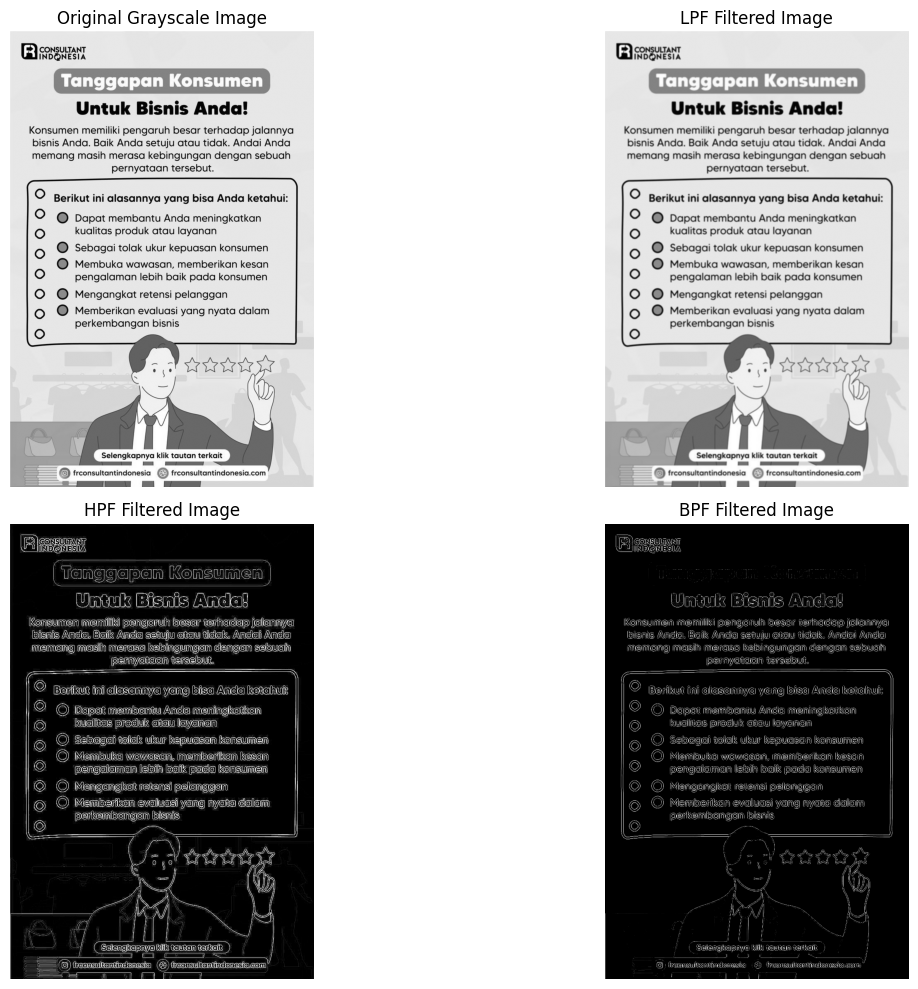

Original, LPF, HPF, and BPF filtered images displayed successfully.


In [9]:
import matplotlib.pyplot as plt

# Display the original and filtered images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lpf_image, cmap='gray')
plt.title('LPF Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(hpf_image, cmap='gray')
plt.title('HPF Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bpf_image, cmap='gray')
plt.title('BPF Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Original, LPF, HPF, and BPF filtered images displayed successfully.")

In [10]:
import numpy as np

# Calculate average pixel values
avg_gray = np.mean(gray_image)
avg_lpf = np.mean(lpf_image)
avg_hpf = np.mean(hpf_image)
avg_bpf = np.mean(bpf_image)

print(f"Average pixel value (Original Grayscale): {avg_gray:.2f}")
print(f"Average pixel value (LPF Filtered): {avg_lpf:.2f}")
print(f"Average pixel value (HPF Filtered): {avg_hpf:.2f}")
print(f"Average pixel value (BPF Filtered): {avg_bpf:.2f}")

Average pixel value (Original Grayscale): 201.96
Average pixel value (LPF Filtered): 201.96
Average pixel value (HPF Filtered): 24.03
Average pixel value (BPF Filtered): 11.75


In [11]:
analysis_content = f"""
Analysis of Image Filtering Effects

Average Pixel Values:
- Original Grayscale: {avg_gray:.2f}
- LPF Filtered: {avg_lpf:.2f}
- HPF Filtered: {avg_hpf:.2f}
- BPF Filtered: {avg_bpf:.2f}

Visual Comparison and Filter Effects:

1.  **Original Grayscale Image**: This image serves as the baseline, showing the unaltered intensity distribution of the scene.

2.  **Low Pass Filter (LPF) Filtered Image**: The LPF image appears smoother and blurrier than the original. This is because the LPF averages out pixel intensities in local neighborhoods, effectively removing sharp details and noise. Its average pixel value ({avg_lpf:.2f}) is very close to the original grayscale image's average ({avg_gray:.2f}), indicating that it primarily smooths the image without significantly altering the overall brightness.

3.  **High Pass Filter (HPF) Filtered Image**: The HPF image prominently highlights edges and fine details, making the image appear sharpened or even showing only the outlines of objects. The background areas, which are typically low-frequency components, are suppressed and appear dark. The average pixel value ({avg_hpf:.2f}) is significantly lower than the original, which is expected as most of the smooth, low-frequency regions have been set to near zero (dark).

4.  **Band Pass Filter (BPF) Filtered Image**: The BPF image seems to enhance certain details, often edges, but in a less aggressive way than the pure HPF. It typically lets through a specific range of frequencies, suppressing both very low frequencies (smooth regions) and very high frequencies (fine noise). Our BPF kernel was constructed by subtracting the LPF from the HPF, aiming to retain edge information while reducing some of the smoothing or very high-frequency noise. Its average pixel value ({avg_bpf:.2f}) is the lowest, suggesting a strong suppression of overall intensity, focusing only on the specific frequency band it allows.

Relationship between Spatial and Frequency Domains:

-   **Low Pass Filter (LPF)**:
    -   **Spatial Domain**: Performs local averaging, smoothing the image, and reducing noise and sharp transitions.
    -   **Frequency Domain**: Passes low-frequency components (e.g., broad areas of constant intensity) and attenuates high-frequency components (e.g., edges, noise). In essence, it blurs the image by removing rapid changes in intensity.

-   **High Pass Filter (HPF)**:
    -   **Spatial Domain**: Enhances edges and fine details by accentuating sharp changes in pixel intensities. It can make the image appear sharper.
    -   **Frequency Domain**: Passes high-frequency components (e.g., edges, details) and attenuates low-frequency components (e.g., uniform regions). This results in an image where only the abrupt changes in intensity are visible.

-   **Band Pass Filter (BPF)**:
    -   **Spatial Domain**: Enhances features that have intermediate spatial frequencies, such as textures or edges of a certain scale, while suppressing very smooth areas and very fine details/noise.
    -   **Frequency Domain**: Passes a specific range of frequencies, attenuating both very low and very high frequencies. This allows for the isolation and enhancement of features corresponding to that particular frequency band.

In summary, LPFs are used for smoothing and noise reduction, HPFs for edge detection and sharpening, and BPFs for enhancing specific textural details or features at intermediate scales within an image.
"""

with open('analysis.txt', 'w') as f:
    f.write(analysis_content)

print("Analysis file 'analysis.txt' created successfully.")

Analysis file 'analysis.txt' created successfully.
